The dataset used in this project is a customer churn dataset that includes customer information, demographic data, and account information. The target variable is 'Exited' (1=churned, 0=retained). The dataset is imblanaced having retained a majority of the customers in the sample. The dataset contains numerical and categorical variables which required label encoding so all explanatory variables are integers, this is required for both Logistic Regression and Random Forest models.

In [22]:
import pandas as pd
import numpy as mp
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
data = pd.read_csv("churndata.csv", header = 0) #import data
data #display data
class_counts = data['Exited'].value_counts()
print("Number of Customers:\n", class_counts)

Number of Customers:
 Exited
0    7963
1    2037
Name: count, dtype: int64


In [24]:
data.dtypes #display data types to determine label encoding

,0
RowNumber,int64
CustomerId,int64
Surname,object
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64


In [25]:

data=data.dropna()
data=data.drop(columns=['CustomerId','Surname','RowNumber'],axis=1)

In [26]:
from sklearn import preprocessing
gender=preprocessing.LabelEncoder()
gender.fit(["Female", "Male"])
data.loc[:,'Gender']=gender.transform(data.loc[:,'Gender'])

In [27]:
data = pd.get_dummies(data, columns=['Geography'], drop_first=True)

In [28]:
#Creating new features
data['Balance_Salary_Ratio'] = data['Balance']/ (data['EstimatedSalary'] +1e-5)
data['CreditScore_Salary'] = data['CreditScore']*data['EstimatedSalary']

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_features = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Balance_Salary_Ratio', 'CreditScore_Salary']
data[numeric_features] = scaler.fit_transform(data[numeric_features])

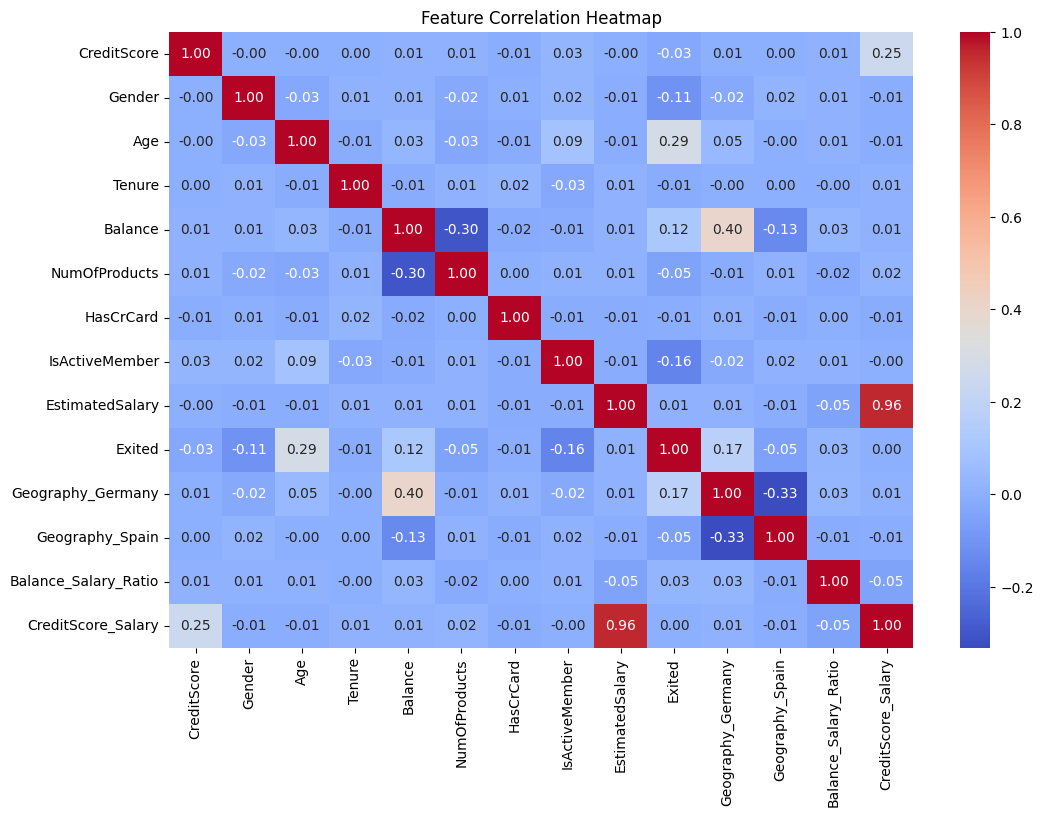

In [30]:
# Step 2: Data Visualization
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Feature Correlation Heatmap')
plt.show()

In [31]:
data

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Balance_Salary_Ratio,CreditScore_Salary
0,-0.326366,0,0.293525,2,-1.225843,1,1,1,0.021918,1,False,False,-0.035807,-0.060540
4,2.063716,0,0.388865,2,0.785762,1,1,1,-0.365188,0,False,True,-0.021160,0.054097
5,-0.057352,1,0.484205,8,0.597360,2,1,0,0.863561,1,False,True,-0.028797,0.804581
6,1.774009,1,1.056244,7,-1.225843,2,1,1,-1.565227,0,False,False,-0.035807,-1.452153
7,-2.840608,0,-0.945893,4,0.618050,4,1,0,0.334840,1,True,False,-0.026910,-0.516901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246329,1,0.007506,5,-1.225843,2,1,0,-0.066375,0,False,False,-0.035807,0.233038
9996,-1.392073,1,-0.373854,10,-0.306361,1,1,1,0.028019,0,False,False,-0.030601,-0.322643
9997,0.604835,0,-0.278514,7,-1.225843,1,0,1,-1.008463,1,False,False,-0.035807,-0.901085
9998,1.256676,1,0.293525,3,-0.022585,2,1,0,-0.125178,1,True,False,-0.028348,0.168783


In [32]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Balance_Salary_Ratio,CreditScore_Salary
count,9.997000e+03,9.997000e+03,9997.000000,9.997000e+03,9997.000000,9997.000000,9997.000000,9.997000e+03,9997.000000,9.997000e+03,9.997000e+03
mean,1.471265e-16,-1.023489e-16,5.013304,3.767007e-17,1.530059,0.705612,0.515155,-6.681106e-17,0.203661,5.152981e-18,1.915487e-16
std,1.000050e+00,1.000050e+00,2.891897,1.000050e+00,0.581513,0.455790,0.499795,1.000050e+00,0.402740,1.000050e+00,1.000050e+00
min,-3.109622e+00,-1.994632e+00,0.000000,-1.225843e+00,1.000000,0.000000,0.000000,-1.739982e+00,0.000000,-3.580732e-02,-1.663294e+00
25%,-6.884995e-01,-6.598737e-01,3.000000,-1.225843e+00,1.000000,0.000000,0.000000,-8.539144e-01,0.000000,-3.580732e-02,-8.351961e-01
50%,1.507446e-02,-1.831743e-01,5.000000,3.321502e-01,1.000000,1.000000,1.000000,1.724631e-03,0.000000,-2.891273e-02,-5.044120e-02
75%,6.979551e-01,4.842049e-01,7.000000,8.199261e-01,2.000000,1.000000,1.000000,8.573535e-01,0.000000,-2.183171e-02,7.780644e-01
max,2.063716e+00,5.060519e+00,10.000000,2.795387e+00,4.000000,1.000000,1.000000,1.736985e+00,1.000000,9.793229e+01,2.675356e+00


In [33]:
import plotly.express as px #for visualization

# Defining the histogram plotting function
def hist(feature):
    group_df = data.groupby([feature, 'Exited']).size().reset_index()
    group_df = group_df.rename(columns={0: 'Count'})
    fig = px.histogram(group_df, x=feature, y='Count', color='Exited', marginal='box', title=f'Churn rate frequency to {feature} distribution', color_discrete_sequence=["green", "red"])
    fig.show()

In [34]:
# call the function above to display the histograms of features.
hist('Gender')

In [35]:
#Enter your code here
def hist(feature):
    group_df = data.groupby([feature, 'Exited']).size().reset_index()
    group_df = group_df.rename(columns={0: 'Count'})
    fig = px.histogram(group_df, x=feature, y='Count', color='Exited', marginal='box', title=f'Churn rate frequency to {feature} distribution', color_discrete_sequence=["green", "red"])
    fig.show()
hist('Age')
hist('CreditScore')
hist('EstimatedSalary')

In [15]:
X = data.drop(columns=['Exited'])
y=data['Exited']

In [36]:
# split train and test data
from sklearn.model_selection import train_test_split
Train_X, Test_X, Train_y, Test_y = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [37]:
# display observations in Train_X
Train_X

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Balance_Salary_Ratio,CreditScore_Salary
9759,-0.243592,0,-1.136573,2,-1.225843,2,1,0,0.440970,False,False,-0.035807,0.346310
3365,0.211661,0,-0.469194,5,0.872601,4,1,1,-1.249219,False,True,0.006986,-1.179360
7599,-1.174793,0,0.579545,7,1.316431,1,1,0,0.361721,False,False,-0.023697,-0.004721
2644,0.884195,1,-1.136573,5,-0.400070,1,0,1,1.600314,False,False,-0.033332,1.949689
366,-1.143753,0,0.293525,9,0.172886,2,1,0,1.260250,True,False,-0.031140,0.717608
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8136,0.677262,0,-0.087834,1,-1.225843,2,1,1,-0.007420,False,False,-0.035807,0.159780
4241,1.473956,1,2.295663,0,-1.225843,2,0,1,-1.267849,False,True,-0.035807,-1.113045
4488,0.677262,0,0.484205,6,1.260237,1,0,0,0.587378,False,False,-0.025113,0.785652
545,1.980943,0,0.484205,2,0.579670,2,1,0,0.461729,False,True,-0.027598,1.061168


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#Create and train logistic model
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(Train_X, Train_y)
#Create and train logistic regression model
model = LogisticRegression()
model.fit(Train_X, Train_y)
#Make predictions
predictions = model.predict(Test_X)
#Evaluate the model
print("Accuracy:", accuracy_score(Test_y, predictions))
print("Confusion Matrix:", confusion_matrix(Test_y, predictions))
print("Classfication Report:", classification_report(Test_y, predictions))


Accuracy: 0.8103333333333333
Confusion Matrix: [[2287  102]
 [ 467  144]]
Classfication Report:               precision    recall  f1-score   support

           0       0.83      0.96      0.89      2389
           1       0.59      0.24      0.34       611

    accuracy                           0.81      3000
   macro avg       0.71      0.60      0.61      3000
weighted avg       0.78      0.81      0.78      3000



In [39]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('Precision:', precision_score(Test_y, predictions, zero_division=0))
print('Recall:', recall_score(Test_y, predictions))
print('F1-Score:', f1_score(Test_y, predictions))

Precision: 0.5853658536585366
Recall: 0.23567921440261866
F1-Score: 0.33605600933488916


In [40]:
from sklearn.ensemble import RandomForestClassifier

#Create and train Random Forrest model
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(Train_X, Train_y)
#Create and train logistic regression model
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(Train_X, Train_y)
#Make predictions
predictions = model.predict(Test_X)
#Evaluate the model
print("Accuracy:", accuracy_score(Test_y, predictions))
print("Confusion Matrix:", confusion_matrix(Test_y, predictions))
print("Classfication Report:", classification_report(Test_y, predictions))

Accuracy: 0.863
Confusion Matrix: [[2299   90]
 [ 321  290]]
Classfication Report:               precision    recall  f1-score   support

           0       0.88      0.96      0.92      2389
           1       0.76      0.47      0.59       611

    accuracy                           0.86      3000
   macro avg       0.82      0.72      0.75      3000
weighted avg       0.85      0.86      0.85      3000



In [41]:
print('Precision:', precision_score(Test_y, predictions, zero_division=0))
print('Recall:', recall_score(Test_y, predictions))
print('F1-Score:', f1_score(Test_y, predictions))

Precision: 0.7631578947368421
Recall: 0.4746317512274959
F1-Score: 0.5852674066599395


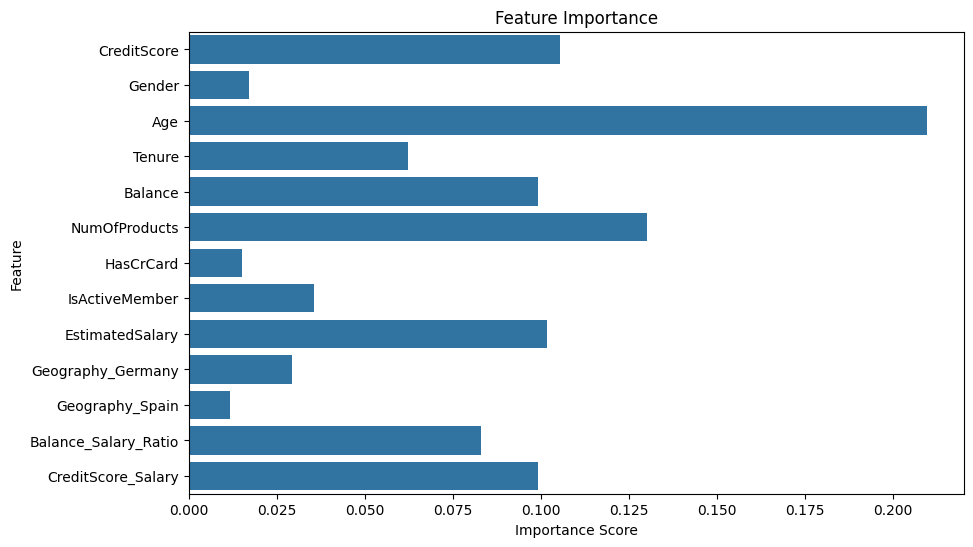

In [42]:
# Feature Importance Visualization
importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()